In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName("E-comm job analysis").config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.8").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
access_key = 'paste your access key'
secret_key = 'paste your secret key'
sc._jsc.hadoopConfiguration().set("fs.s3a.access.key",access_key)
sc._jsc.hadoopConfiguration().set("fs.s3a.secret.key",secret_key)
aws_region="your aws s3 region"
sc._jsc.hadoopConfiguration().set("fs.s3a.endpoints","s3."+aws_region+".amazonaws.com")

In [0]:
from pyspark.sql.types import StructType , StructField , StringType , IntegerType

customer_schema = StructType([
    StructField("customer_id",StringType(), True),
    StructField("customer_unique_id",StringType(), True),
    StructField("customer_zip_code_prefix",IntegerType(), True),
    StructField("customer_city",StringType(), True),
    StructField("customer_state",StringType(), True),
])

In [0]:
customer_df = spark.read.schema(customer_schema).format("csv").option("header","true").load("s3://soujanya-workspace/customers.csv")

In [0]:
customer_df.describe().show()

+-------+--------------------+--------------------+------------------------+-------------------+--------------+
|summary|         customer_id|  customer_unique_id|customer_zip_code_prefix|      customer_city|customer_state|
+-------+--------------------+--------------------+------------------------+-------------------+--------------+
|  count|               99440|               99440|                   99440|              99440|         99440|
|   mean|                null|                null|       35137.68303499598|               null|          null|
| stddev|                null|                null|       29798.01632166116|               null|          null|
|    min|00012a2ce6f8dcda2...|0000366f3b9a7992b...|                    1003|abadia dos dourados|            AC|
|    max|ffffe8b65bbe3087b...|ffffd2657e2aad290...|                   99990|             zortea|            TO|
+-------+--------------------+--------------------+------------------------+-------------------+--------

In [0]:
from pyspark.sql.types import StructField ,StructField , IntegerType , DoubleType , StringType
geolocation_schema = StructType([
    StructField("geolocation_zip_code_prefix",IntegerType(),True),
    StructField("geolocation_lat",DoubleType(),True),
    StructField("geolocation_lng",DoubleType(),True),
    StructField("geolocation_city",StringType(),True),
    StructField("geolocation_state",StringType(),True),
])
geolocation_df = spark.read.schema(geolocation_schema).format("csv").option("header","true").load("s3://soujanya-workspace/geolocation.csv")

In [0]:
geolocation_df.show(5)

+---------------------------+---------------+---------------+----------------+-----------------+
|geolocation_zip_code_prefix|geolocation_lat|geolocation_lng|geolocation_city|geolocation_state|
+---------------------------+---------------+---------------+----------------+-----------------+
|                       5409|     -23.560673|      -46.67341|       sao paulo|               SP|
|                       5409|     -23.560673|      -46.67341|       sao paulo|               SP|
|                       5409|     -23.560673|      -46.67341|       sao paulo|               SP|
|                       5409|     -23.560673|      -46.67341|       sao paulo|               SP|
|                       5409|     -23.560673|      -46.67341|       sao paulo|               SP|
+---------------------------+---------------+---------------+----------------+-----------------+
only showing top 5 rows



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType
from pyspark.sql.functions import col, to_date



# Define the schema for the order_items DataFrame
order_items_schema = StructType([
    StructField("order_id", StringType(), True),                  # order_id as StringType
    StructField("order_item_id", IntegerType(), True),            # order_item_id as IntegerType
    StructField("product_id", StringType(), True),                # product_id as StringType
    StructField("seller_id", StringType(), True),                 # seller_id as StringType
    StructField("shipping_limit_date", StringType(), True),       # Initially read shipping_limit_date as StringType
    StructField("price", DoubleType(), True),                     # price as DoubleType
    StructField("freight_value", DoubleType(), True)              # freight_value as DoubleType
])

# Path to the data file (e.g., CSV)
file_path = "s3://soujanya-workspace/order_items.csv"  # Adjust the path as needed

# Read the data into a DataFrame with the specified schema
order_items_df = spark.read \
    .format("csv") \
    .option("header", "true") \
    .schema(order_items_schema) \
    .load(file_path)

# Convert 'shipping_limit_date' from StringType to DateType
order_items_df = order_items_df.withColumn("shipping_limit_date", to_date(col("shipping_limit_date"), "M/d/yyyy"))

# Show the DataFrame content
order_items_df.show(5)


+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|         2017-05-03|239.9|        19.93|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|         2018-01-18|199.0|        17.87|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|         2018-08-15|12.99|        12.79|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|         2017-02-13|199.9|        18.14|
|00048cc3ae777c65d...|            1|ef92defde845ab845...|6426d21aca402a131...|         2017-05-23| 21.9|        12.69|
+--------------------+-------------+------------

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType



# Define the schema for the payment DataFrame
payment_schema = StructType([
    StructField("order_id", StringType(), True),                  # order_id as StringType
    StructField("payment_sequential", IntegerType(), True),       # payment_sequential as IntegerType
    StructField("payment_type", StringType(), True),              # payment_type as StringType
    StructField("payment_installments", IntegerType(), True),     # payment_installments as IntegerType
    StructField("payment_value", DoubleType(), True)              # payment_value as DoubleType
])

# Path to the data file (e.g., CSV)
file_path = "s3://soujanya-workspace/order_payments.csv"  # Adjust the path as needed

# Read the data into a DataFrame with the specified schema
payment_df = spark.read \
    .format("csv") \
    .option("header", "true") \
    .schema(payment_schema) \
    .load(file_path)

# Show the DataFrame content
payment_df.show(5)


+--------------------+------------------+------------+--------------------+-------------+
|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+--------------------+------------------+------------+--------------------+-------------+
|a9810da82917af2d9...|                 1| credit_card|                   1|        24.39|
|25e8ea4e93396b6fa...|                 1| credit_card|                   1|        65.71|
|ba78997921bbcdc13...|                 1| credit_card|                   8|       107.78|
|42fdf880ba16b47b5...|                 1| credit_card|                   2|       128.45|
|298fcdf1f73eb413e...|                 1| credit_card|                   2|        96.12|
+--------------------+------------------+------------+--------------------+-------------+
only showing top 5 rows



In [0]:
from pyspark.sql.types import StructField , StructType  , IntegerType , StringType , TimestampType
review_schema = StructType([
    StructField("review_id",StringType(),True),
    StructField("order_id",StringType(),True),
    StructField("review_score",IntegerType(),True),
    StructField("review_comment_title", StringType(), True),
    StructField("review_comment_message", StringType(), True),
    StructField("review_creation_date", TimestampType(), True),
    StructField("review_answer_timestamp", TimestampType(), True),
])
review_df = spark.read.format('csv').option("header","true").schema(review_schema).load("s3://soujanya-workspace/order_reviews.csv")
review_df.show(5)

+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|           review_id|            order_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|a34d2c4ace9724546...|9cd3b6a2b07667e42...|           5|                null|                  null|                null|                   null|
|7dcdffff094e4beb8...|6949db3c04a148477...|           5|                null|                  null|                null|                   null|
|ddcf5695dfc21bfbc...|6a92e66b9d3bd75ef...|           5|                null|                  null|                null|                   null|
|eef97ccb23224de3c...|a86ad6bfca543eb89...|           5|                null|                  null|                null|   

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType



# Define the schema for the payment DataFrame
orders_schema = StructType([
    StructField("order_id", StringType(), True),                  # order_id as StringType
    StructField("payment_sequential", IntegerType(), True),       # payment_sequential as IntegerType
    StructField("payment_type", StringType(), True),              # payment_type as StringType
    StructField("payment_installments", IntegerType(), True),     # payment_installments as IntegerType
    StructField("payment_value", DoubleType(), True)              # payment_value as DoubleType
])

# Path to the data file (e.g., CSV)
file_path = "s3://soujanya-workspace/orders.csv"  # Adjust the path as needed

# Read the data into a DataFrame with the specified schema
orders_df = spark.read \
    .format("csv") \
    .option("header", "true") \
    .schema(orders_schema) \
    .load(file_path)

# Show the DataFrame content
orders_df.show(5)


+--------------------+------------------+------------+--------------------+-------------+
|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+--------------------+------------------+------------+--------------------+-------------+
|0573b5e23cbd79800...|                 1|      boleto|                   1|        51.95|
|8cd68144cdb62dc0d...|                 1|      boleto|                   1|       330.66|
|b69b9260e79a0da00...|                 1|      boleto|                   1|       283.34|
|00d8d65b666158b63...|                 1|      boleto|                   1|       130.88|
|32b1d8f3789a57f1f...|                 1|      boleto|                   1|         56.6|
+--------------------+------------------+------------+--------------------+-------------+
only showing top 5 rows



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType


# Define the schema for the product categories DataFrame
product_category_schema = StructType([
    StructField("product_category_name", StringType(), True),          # product_category_name as StringType
    StructField("product_category_name_english", StringType(), True)   # product_category_name_english as StringType
])

# Path to the data file (e.g., CSV)
file_path = "s3://soujanya-workspace/products _category.csv"  # Adjust the path as needed

# Read the data into a DataFrame with the specified schema
product_category_df = spark.read \
    .format("csv") \
    .option("header", "true") \
    .schema(product_category_schema) \
    .load(file_path)

# Show the DataFrame content
product_category_df.show(5)

+---------------------+-----------------------------+
|product_category_name|product_category_name_english|
+---------------------+-----------------------------+
| informatica_acess...|         computers_accesso...|
|           automotivo|                         auto|
|      cama_mesa_banho|               bed_bath_table|
|     moveis_decoracao|              furniture_decor|
|        esporte_lazer|               sports_leisure|
+---------------------+-----------------------------+
only showing top 5 rows



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Initialize SparkSession
spark = SparkSession.builder.appName("SellerDetails").getOrCreate()

# Define the schema for the seller DataFrame
seller_schema = StructType([
    StructField("seller_id", StringType(), True),               # seller_id as StringType
    StructField("seller_zip_code_prefix", IntegerType(), True), # seller_zip_code_prefix as IntegerType
    StructField("seller_city", StringType(), True),             # seller_city as StringType
    StructField("seller_state", StringType(), True)             # seller_state as StringType
])

# Path to the data file (e.g., CSV)
file_path = "s3://soujanya-workspace/seller.csv"  # Adjust the path as needed

# Read the data into a DataFrame with the specified schema
seller_df = spark.read \
    .format("csv") \
    .option("header", "true") \
    .schema(seller_schema) \
    .load(file_path)

# Show the DataFrame content
seller_df.show(5)


+--------------------+----------------------+-----------+------------+
|           seller_id|seller_zip_code_prefix|seller_city|seller_state|
+--------------------+----------------------+-----------+------------+
|c0f3eea2e14555b6f...|                  4195|  sao paulo|          SP|
|768a86e36ad6aae3d...|                  1529|  sao paulo|          SP|
|8bd0f31cf0a614c65...|                  1222|  sao paulo|          SP|
|05a48cc8859962767...|                  5372|  sao paulo|          SP|
|f9ec7093df3a7b346...|                  5138|  sao paulo|          SP|
+--------------------+----------------------+-----------+------------+
only showing top 5 rows



In [0]:
customer_df.show(5)

+--------------------+--------------------+------------------------+-------------+--------------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|customer_city|customer_state|
+--------------------+--------------------+------------------------+-------------+--------------+
|4e7b3e00288586ebd...|060e732b5b29e8181...|                    1151|    sao paulo|            SP|
|fd826e7cf63160e53...|addec96d2e059c80c...|                    4534|    sao paulo|            SP|
|eabebad39a88bb6f5...|295c05e81917928d7...|                    5704|    sao paulo|            SP|
|9b8ce803689b3562d...|7f3a72e8f988c6e73...|                    5416|    sao paulo|            SP|
|2938121a40a20953c...|482441ea6a06b1f72...|                    5713|    sao paulo|            SP|
+--------------------+--------------------+------------------------+-------------+--------------+
only showing top 5 rows



In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
customer_city_dist = customer_df.groupBy("customer_city").count().orderBy(F.desc("count"))
customer_city_dist.show(5)
customer_state_dist = customer_df.groupBy("customer_state").count().orderBy(F.desc("count"))
customer_state_dist.show(5)

+--------------+-----+
| customer_city|count|
+--------------+-----+
|     sao paulo|15540|
|rio de janeiro| 6882|
|belo horizonte| 2773|
|      brasilia| 2131|
|      curitiba| 1521|
+--------------+-----+
only showing top 5 rows

+--------------+-----+
|customer_state|count|
+--------------+-----+
|            SP|41745|
|            RJ|12852|
|            MG|11635|
|            RS| 5466|
|            PR| 5045|
+--------------+-----+
only showing top 5 rows



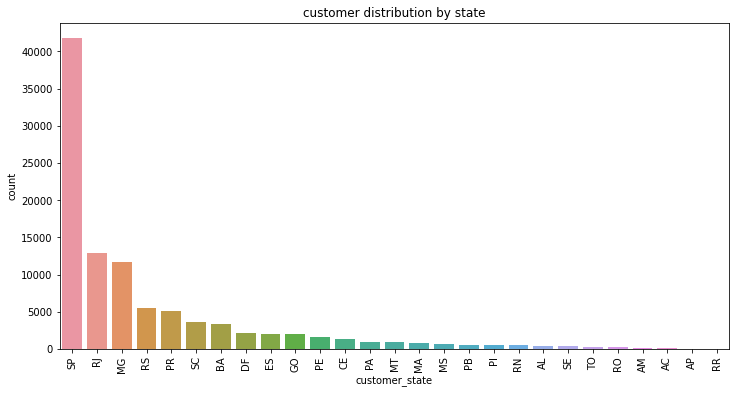

In [0]:
customer_state_dist_pd = customer_state_dist.toPandas()
plt.figure(figsize = (12,6))
sns.barplot(x="customer_state",y="count",data = customer_state_dist_pd)
plt.title("customer distribution by state")
plt.xticks(rotation=90)
plt.show()

In [0]:
orders_df.show(5)

+--------------------+------------------+------------+--------------------+-------------+
|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+--------------------+------------------+------------+--------------------+-------------+
|0573b5e23cbd79800...|                 1|      boleto|                   1|        51.95|
|8cd68144cdb62dc0d...|                 1|      boleto|                   1|       330.66|
|b69b9260e79a0da00...|                 1|      boleto|                   1|       283.34|
|00d8d65b666158b63...|                 1|      boleto|                   1|       130.88|
|32b1d8f3789a57f1f...|                 1|      boleto|                   1|         56.6|
+--------------------+------------------+------------+--------------------+-------------+
only showing top 5 rows



In [0]:
review_join = order_items_df.join(review_df,"order_id","inner")
product_reviews = review_join.groupBy("product_id").agg(F.avg("review_score").alias("avg_review_score"))
seller_reviews = review_join.groupBy("seller_id").agg(F.avg("review_score").alias("avg_review_score"))
product_reviews.show(5)
seller_reviews.show(5)

+--------------------+------------------+
|          product_id|  avg_review_score|
+--------------------+------------------+
|0b0172eb0fd18479d...|             3.875|
|42a2bd596fda1baef...|               4.0|
|460a66fcc404a3d73...|3.8333333333333335|
|30360c8b0b2ac6918...| 4.666666666666667|
|13b4ff901d43edec6...|               5.0|
+--------------------+------------------+
only showing top 5 rows

+--------------------+------------------+
|           seller_id|  avg_review_score|
+--------------------+------------------+
|ff063b022a9a0aab9...|  4.28421052631579|
|8e6cc767478edae94...|3.9035087719298245|
|a49928bcdf77c55c6...| 2.952830188679245|
|da7039f29f90ce5b4...| 4.555555555555555|
|062ce95fa2ad4dfae...| 3.966666666666667|
+--------------------+------------------+
only showing top 5 rows



In [0]:
customer_geo = customer_df.join(geolocation_df,customer_df["customer_zip_code_prefix"]==geolocation_df["geolocation_zip_code_prefix"],"inner") 
customer_geo.select("customer_city","geolocation_lat","geolocation_lng").show(5)
seller_geo = seller_df.join(geolocation_df,seller_df["seller_zip_code_prefix"] == geolocation_df["geolocation_zip_code_prefix"],"inner")
seller_geo.select("seller_city","geolocation_lat","geolocation_lng").show(5)

+-------------+---------------+---------------+
|customer_city|geolocation_lat|geolocation_lng|
+-------------+---------------+---------------+
|    sao paulo|     -23.560673|      -46.67341|
|    sao paulo|     -23.560673|      -46.67341|
|    sao paulo|     -23.560673|      -46.67341|
|    sao paulo|     -23.560673|      -46.67341|
|    sao paulo|     -23.560673|      -46.67341|
+-------------+---------------+---------------+
only showing top 5 rows

+-----------+---------------+---------------+
|seller_city|geolocation_lat|geolocation_lng|
+-----------+---------------+---------------+
|  sao paulo|     -23.561802|     -46.479683|
|  sao paulo|     -23.561802|     -46.479683|
|  sao paulo|      -23.56478|     -46.476734|
|  sao paulo|      -23.56478|     -46.476734|
|  sao paulo|     -23.564657|     -46.468876|
+-----------+---------------+---------------+
only showing top 5 rows

